In [3]:
import pandas as pd 


df=pd.read_csv('../data/cleaned.csv')

In [4]:
from sklearn.model_selection import train_test_split

X=df.drop('Time_taken(min)',axis=1)
y=df['Time_taken(min)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=44), param_grid=xgb_param, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_pred = xgb_grid.predict(X_test)


XGBoost MAE: 5.632178783416748
XGBoost RMSE: 7.140928433104392
XGBoost R²: 0.4222491383552551


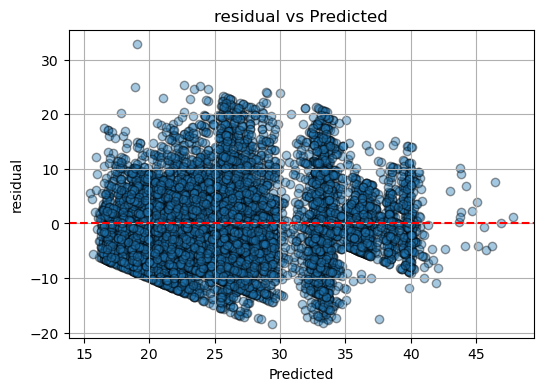

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


residual=y_test-xgb_pred
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("XGBoost R²:", r2_score(y_test, xgb_pred))
    
    # Optional: Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(xgb_pred,residual, alpha=0.4, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('residual')
plt.title('residual vs Predicted')
plt.grid()
plt.show()


In [7]:
import joblib

joblib.dump(xgb_pred,'../data/xg.joblib')


['../data/xg.joblib']